# Imports

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys 

from datetime import datetime, date, timedelta

## Datasets

In [111]:
train = pd.read_csv("D:/GitHub/Dataset/g-research-crypto-forecasting/train.csv")

print(train.shape)
train.head()

(24236806, 10)


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


## timestamp to datetime

In [112]:
first_step = 0
step = 1000000
df = pd.DataFrame()

for rows_interval in range(first_step, train.shape[0], step):
    tmp_df = train.iloc[rows_interval:rows_interval + step]
    tmp_df['datetime'] = tmp_df.timestamp.apply(datetime.fromtimestamp)
    df = pd.concat([df, tmp_df], axis=0)

C:\Users\Audb\AppData\Local\Temp/ipykernel_1836/1326463573.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['datetime'] = tmp_df.timestamp.apply(datetime.fromtimestamp)


# Stats

## Global

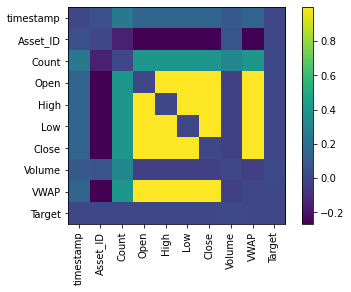

In [6]:
corr = df.corr()
cols = corr.columns
np.fill_diagonal(corr.values, 0)

hm = plt.imshow(corr)
plt.colorbar(hm)
plt.xticks(ticks=np.arange(len(cols)), labels=cols, rotation=90)
plt.yticks(ticks=np.arange(len(cols)), labels=cols)
plt.show()

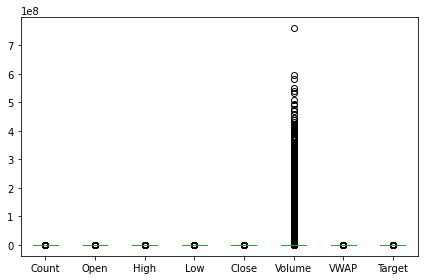

In [7]:
boxplot_df = df[df.datetime >= '2021-01-01']

plt.rcParams["figure.figsize"] = (6,4)

boxplot_df[['Count', 'Open', 'High', 'Low', 'Close','Volume', 'VWAP', 'Target']].plot(kind='box')
plt.tight_layout()
plt.show()

## By asset

### 14 dfs

In [23]:
l_df = []

for asset in range(0,14):
    l_df.append(df[df.Asset_ID == asset])

0


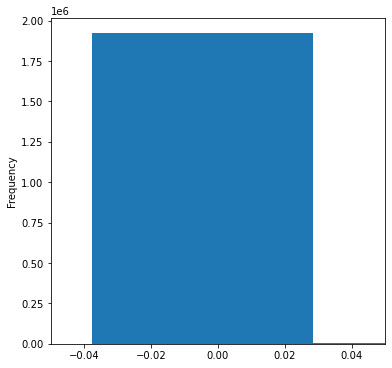

1


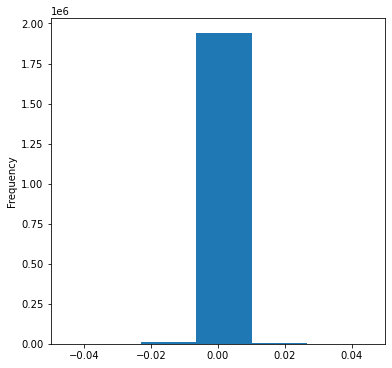

2


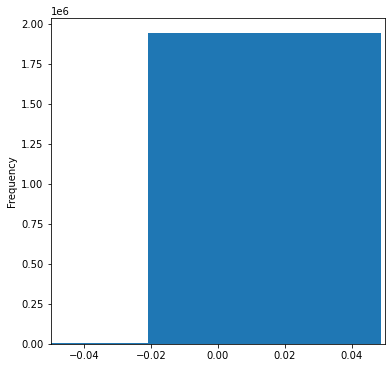

3


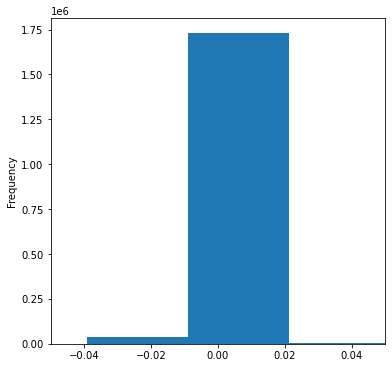

4


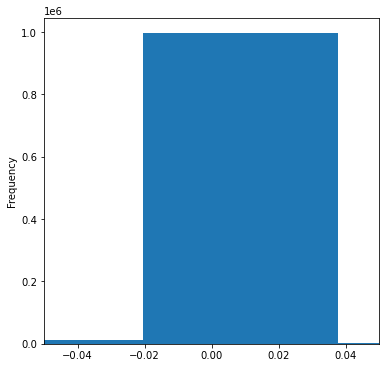

5


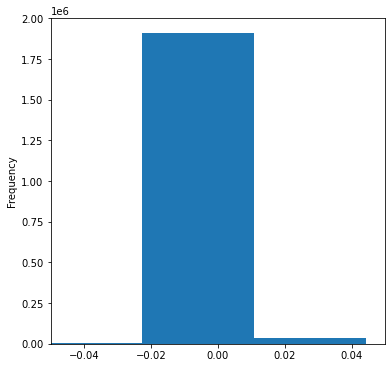

6


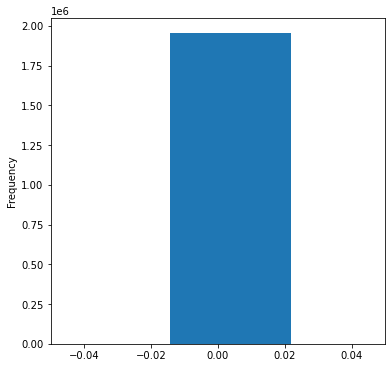

7


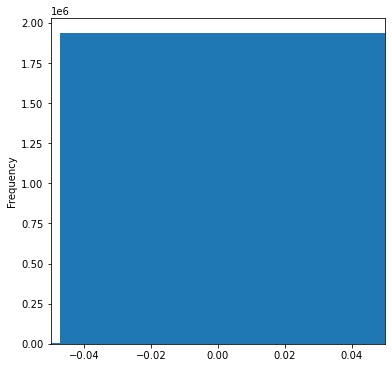

8


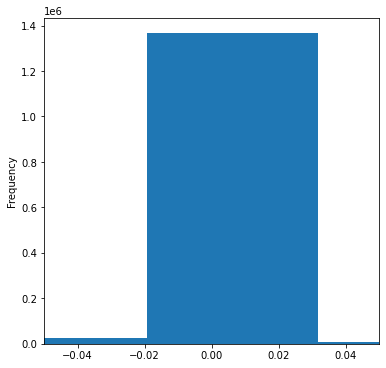

9


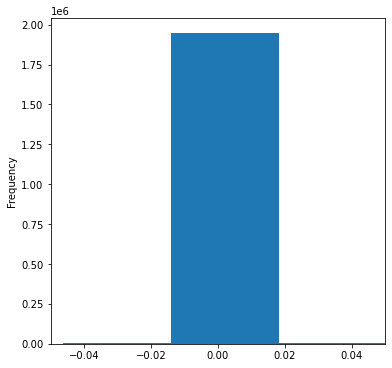

10


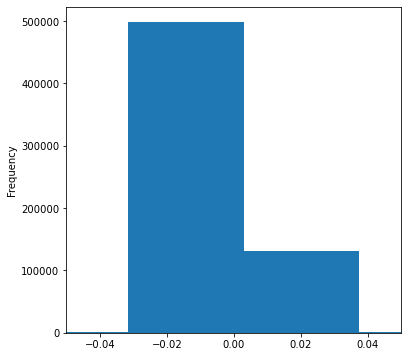

11


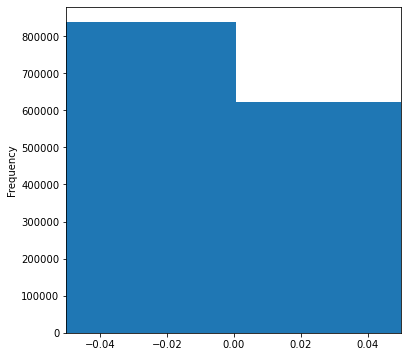

12


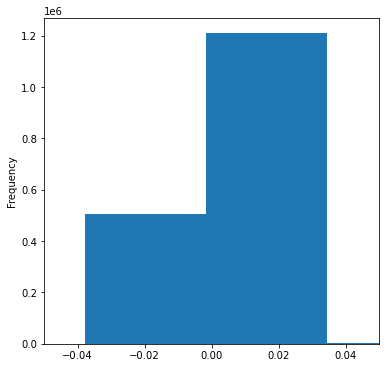

13


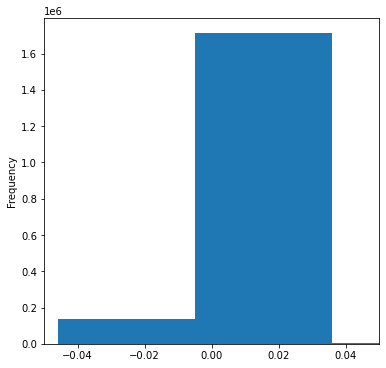

In [28]:


for elt in l_df:
    print(elt.Asset_ID.unique()[0])
    elt.Target.plot(kind='hist', xlim = (-0.05,0.05))
    plt.show()

### Missing values

In [9]:
datetime_info_df = pd.DataFrame(columns=['Asset_ID', 'first_date', 'last_date', 'missing_values'])

for i, elt in enumerate(l_df):
    datetime_info_df.loc[i] = [elt.iloc[0].Asset_ID, elt.iloc[0].datetime, elt.iloc[elt.shape[0]-1].datetime, elt.Target.isna().sum()]

datetime_info_df

,Asset_ID,first_date,last_date,missing_values
0,0,2018-01-01 01:01:00,2021-09-21 02:00:00,13415
1,1,2018-01-01 01:01:00,2021-09-21 02:00:00,304
2,2,2018-01-01 01:01:00,2021-09-21 02:00:00,4861
3,3,2018-04-17 11:11:00,2021-09-21 02:00:00,18731
4,4,2019-04-12 16:34:00,2021-09-21 02:00:00,144974
5,5,2018-01-01 01:01:00,2021-09-21 02:00:00,2302
6,6,2018-01-01 01:01:00,2021-09-21 02:00:00,340
7,7,2018-01-01 01:01:00,2021-09-21 02:00:00,9326
8,8,2018-05-09 10:07:00,2021-09-21 02:00:00,193106
9,9,2018-01-01 01:01:00,2021-09-21 02:00:00,521


### Correlation between assets

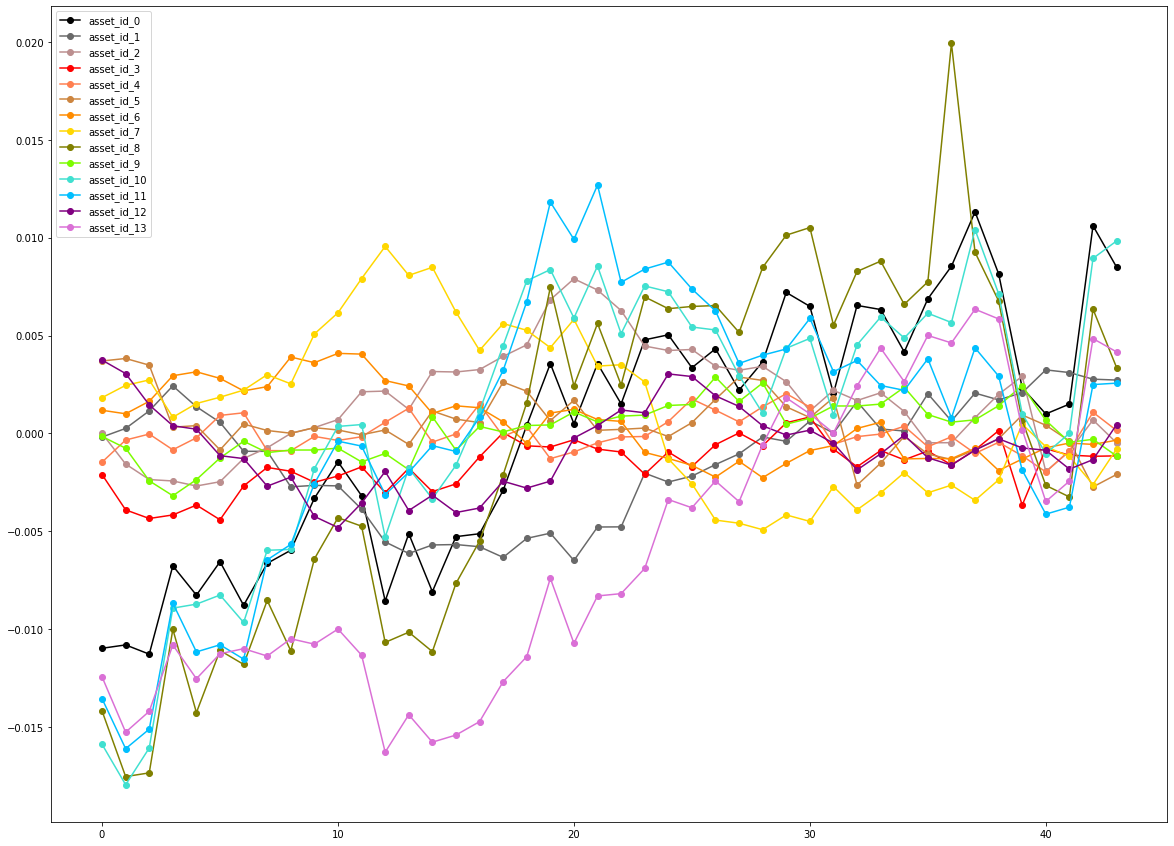

In [10]:
plt.rcParams["figure.figsize"] = (20,15)

plt.plot(range(60), df[df['Asset_ID'] == 0].tail(60).Target, marker = 'o', label = 'asset_id_0', color='black')
plt.plot(range(60), df[df['Asset_ID'] == 1].tail(60).Target, marker = 'o', label = 'asset_id_1', color='dimgrey')
plt.plot(range(60), df[df['Asset_ID'] == 2].tail(60).Target, marker = 'o', label = 'asset_id_2', color='rosybrown')
plt.plot(range(60), df[df['Asset_ID'] == 3].tail(60).Target, marker = 'o', label = 'asset_id_3', color='red')
plt.plot(range(60), df[df['Asset_ID'] == 4].tail(60).Target, marker = 'o', label = 'asset_id_4', color='coral')
plt.plot(range(60), df[df['Asset_ID'] == 5].tail(60).Target, marker = 'o', label = 'asset_id_5', color='peru')
plt.plot(range(60), df[df['Asset_ID'] == 6].tail(60).Target, marker = 'o', label = 'asset_id_6', color='darkorange')
plt.plot(range(60), df[df['Asset_ID'] == 7].tail(60).Target, marker = 'o', label = 'asset_id_7', color='gold')
plt.plot(range(60), df[df['Asset_ID'] == 8].tail(60).Target, marker = 'o', label = 'asset_id_8', color='olive')
plt.plot(range(60), df[df['Asset_ID'] == 9].tail(60).Target, marker = 'o', label = 'asset_id_9', color='lawngreen')
plt.plot(range(60), df[df['Asset_ID'] == 10].tail(60).Target, marker = 'o', label = 'asset_id_10', color='turquoise')
plt.plot(range(60), df[df['Asset_ID'] == 11].tail(60).Target, marker = 'o', label = 'asset_id_11', color='deepskyblue')
plt.plot(range(60), df[df['Asset_ID'] == 12].tail(60).Target, marker = 'o', label = 'asset_id_12', color='purple')
plt.plot(range(60), df[df['Asset_ID'] == 13].tail(60).Target, marker = 'o', label = 'asset_id_13', color='orchid')

plt.legend()
plt.show()

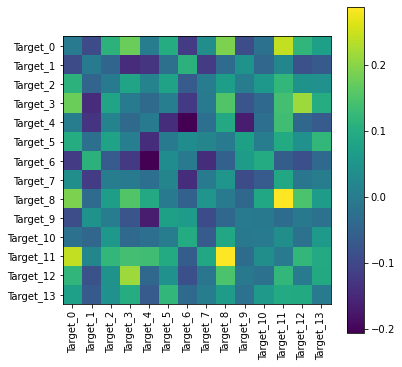

In [11]:
plt.rcParams["figure.figsize"] = (6,6)

l_dt = pd.date_range(df.iloc[0].datetime,df.iloc[df.shape[0]-1].datetime-timedelta(minutes=1), freq='T')
target_df = pd.DataFrame(index=l_dt).reset_index()

for elt in l_df:
    elt_tmp = elt.copy()
    elt_tmp = elt_tmp.rename(columns={'Target':f'Target_{elt_tmp.Asset_ID.unique()[0]}', 
                                     'datetime':f'datetime_{elt_tmp.Asset_ID.unique()[0]}'})
    target_df = pd.merge(target_df, 
                         elt_tmp[[f'Target_{elt_tmp.Asset_ID.unique()[0]}', f'datetime_{elt_tmp.Asset_ID.unique()[0]}']], 
                         how='left', left_on='index', right_on=f'datetime_{elt_tmp.Asset_ID.unique()[0]}')
    
corr = target_df.corr()
cols = corr.columns
np.fill_diagonal(corr.values, 0)

hm = plt.imshow(corr)
plt.colorbar(hm)
plt.xticks(ticks=np.arange(len(cols)), labels=cols, rotation=90)
plt.yticks(ticks=np.arange(len(cols)), labels=cols)
plt.show()

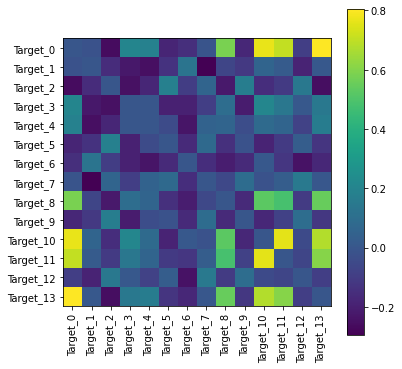

In [12]:
corr = target_df[target_df['index'] >= '2021-09-18'].corr()
cols = corr.columns
np.fill_diagonal(corr.values, 0)

hm = plt.imshow(corr)
plt.colorbar(hm)
plt.xticks(ticks=np.arange(len(cols)), labels=cols, rotation=90)
plt.yticks(ticks=np.arange(len(cols)), labels=cols)
plt.show()

### Saisonnality

Normal d'avoir ces coefficients d'autocorrelations partielles car les target sont composées en partie des mêmes valeurs (horizon 15min)

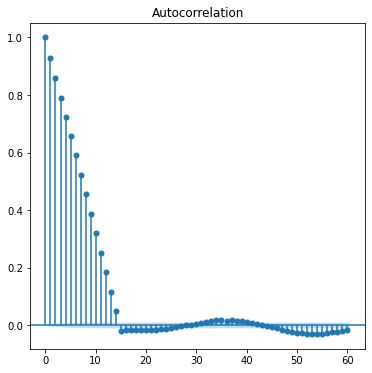

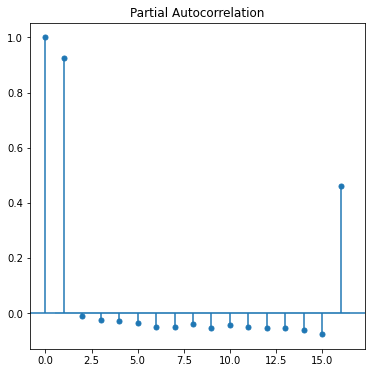

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

tmp = df[df['Asset_ID'] == 0].copy()
tmp = tmp[tmp.datetime >= '2021-01-01 00:00:00']
tmp.Target = tmp.Target.fillna(0)
plot_acf(tmp.Target, lags=60);
plot_pacf(tmp.Target, lags=16);

In [19]:
l_df = []

for elt in l_df:
    elt.Target.plot(kind='hist')
    plt.show()

In [20]:
for elt in l_df:
    elt.Target.plot(kind='hist')
    plt.show()

### Impact de chaque feature avec regression linéaire 

In [89]:
from sklearn.linear_model import LinearRegression
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [32]:
df.head(5)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,datetime
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2018-01-01 01:01:00
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,2018-01-01 01:01:00
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,2018-01-01 01:01:00
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,2018-01-01 01:01:00
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2018-01-01 01:01:00


In [100]:
model = LinearRegression()

y = df['Target'].loc[df['datetime'] > '2021-01-01 01:01:00']
y = y.fillna(y.median())


X = df.loc[df['datetime'] > '2021-01-01 01:01:00']
X = X.drop(columns = {'timestamp', 'Asset_ID', 'datetime', 'Target'})
X['Count'] = minmax_scaling(X,  columns=['Count'])
X['Open'] = minmax_scaling(X,  columns=['Open'])
X['High'] = minmax_scaling(X,  columns=['High'])
X['Low'] = minmax_scaling(X,  columns=['Low'])
X['Close'] = minmax_scaling(X,  columns=['Close'])
X['VWAP'] = minmax_scaling(X,  columns=['VWAP'])
X['Volume'] = minmax_scaling(X,  columns=['Volume'])


model.fit(X,y)

cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print(cdf)

        Coefficients
Count       0.001178
Open        0.009799
High       -0.068621
Low        -0.005743
Close      -0.023051
Volume      0.021936
VWAP        0.087537


        Coefficients
Count       0.001178
Open        0.009799
High       -0.068621
Low        -0.005743
Close      -0.023051
Volume      0.021936
VWAP        0.087537


In [96]:
X.head(5)

,Count,Open,High,Low,Close,Volume,VWAP
18935925,0.000358,2.729466e-06,2.728629e-06,2.729203e-06,2.726128e-06,1.805075e-04,2.728226e-06
18935926,0.000824,5.290956e-03,5.288835e-03,5.289974e-03,5.286054e-03,2.587916e-07,5.288936e-03
18935927,0.000800,5.768899e-04,5.762310e-04,5.771594e-04,5.759534e-04,1.025156e-06,5.763453e-04
18935928,0.011926,4.479708e-01,4.480671e-01,4.476768e-01,4.475175e-01,1.299822e-07,4.477590e-01
18935929,0.000133,1.163474e-09,1.134052e-09,1.051484e-09,1.023785e-09,8.484790e-04,1.072811e-09


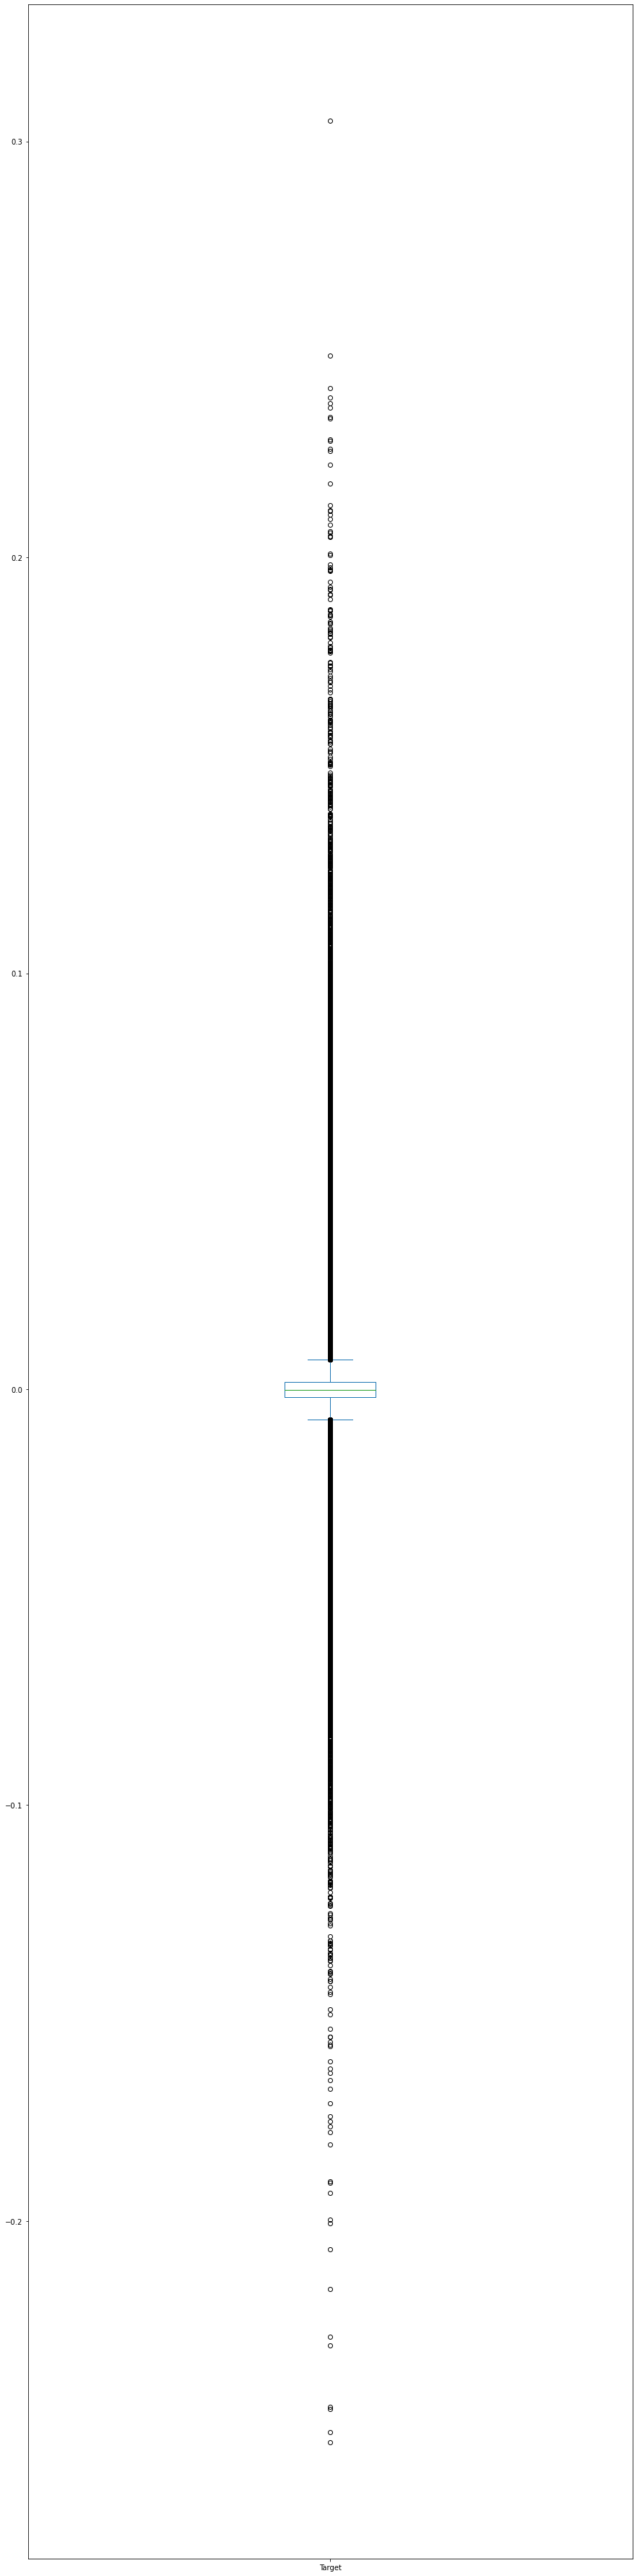

In [52]:
plt.rcParams["figure.figsize"] = (15,65)
y.plot(kind ='box')
plt.show()

### MI SCORE (test)


In [105]:
from sklearn.feature_selection import mutual_info_regression

In [108]:
mutual_info_regression(X, y )

array([0.0161499 , 0.04671616, 0.04696539, 0.04683082, 0.04707042,
       0.03212646, 0.04704838])

In [109]:
X

,Count,Open,High,Low,Close,Volume,VWAP
18935925,0.000358,2.729466e-06,2.728629e-06,2.729203e-06,2.726128e-06,1.805075e-04,2.728226e-06
18935926,0.000824,5.290956e-03,5.288835e-03,5.289974e-03,5.286054e-03,2.587916e-07,5.288936e-03
18935927,0.000800,5.768899e-04,5.762310e-04,5.771594e-04,5.759534e-04,1.025156e-06,5.763453e-04
18935928,0.011926,4.479708e-01,4.480671e-01,4.476768e-01,4.475175e-01,1.299822e-07,4.477590e-01
18935929,0.000133,1.163474e-09,1.134052e-09,1.051484e-09,1.023785e-09,8.484790e-04,1.072811e-09
...,...,...,...,...,...,...,...
24236801,0.004690,2.425348e-03,2.422888e-03,2.422980e-03,2.421583e-03,6.138456e-06,2.422688e-03
24236802,0.000200,3.760551e-02,3.756542e-02,3.757851e-02,3.753985e-02,5.232540e-09,3.757440e-02
24236803,0.002297,1.339123e-06,1.339214e-06,1.340008e-06,1.338446e-06,2.887418e-03,1.339212e-06
24236804,0.001067,4.282957e-06,4.280832e-06,4.286976e-06,4.280988e-06,2.406706e-04,4.282837e-06
